<a href="https://colab.research.google.com/github/Aditya8215/Machine_Learning/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.How Big is Data

# 2.How does Data Look like

# 3.What is the Datatype of columns?

# 4.Preprocessing The data -
1.Data Cleaning  
2.Data Nomarlization

3.Data Transformation

#5. Correlation

In [1]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset
df = sns.load_dataset('titanic')

In [2]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
618,1,2,female,4.0,2,1,39.0000,S,Second,child,False,F,Southampton,yes,False
734,0,2,male,23.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
317,0,2,male,54.0,0,0,14.0000,S,Second,man,True,NaN,Southampton,no,True
109,1,3,female,NaN,1,0,24.1500,Q,Third,woman,False,NaN,Queenstown,yes,False
325,1,1,female,36.0,0,0,135.6333,C,First,woman,False,C,Cherbourg,yes,True


## Categorical Values

# 1. Countplot

<Axes: xlabel='survived', ylabel='count'>

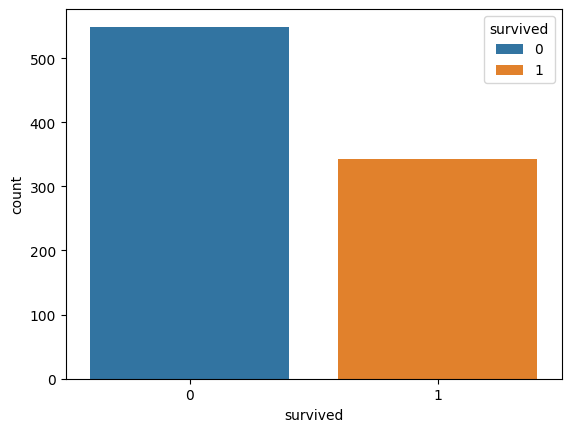

In [3]:
sns.countplot(x=df['survived'],hue=df['survived'])

<Axes: xlabel='pclass', ylabel='count'>

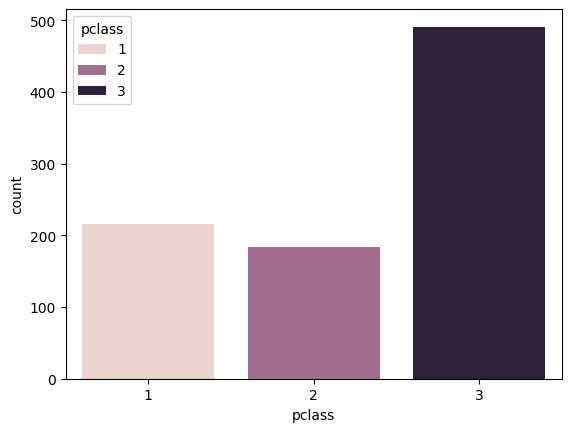

In [4]:
sns.countplot(x=df['pclass'],hue=df['pclass'])

# 2. Piechart

In [5]:
import matplotlib.pyplot as plt
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
values=df['embark_town'].value_counts()
values

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


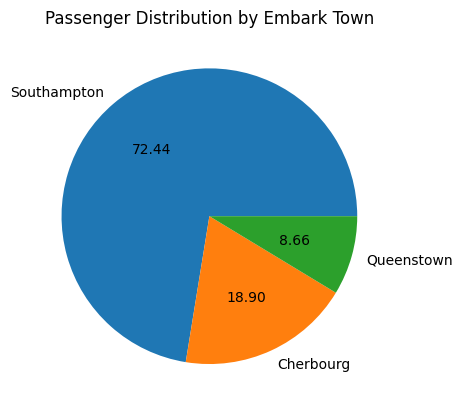

In [7]:
labels=values.index
plt.pie(values,labels=labels,autopct='%.2f')
plt.title("Passenger Distribution by Embark Town")
plt.show()

In [8]:
values=df['pclass'].value_counts()
labels=values.index

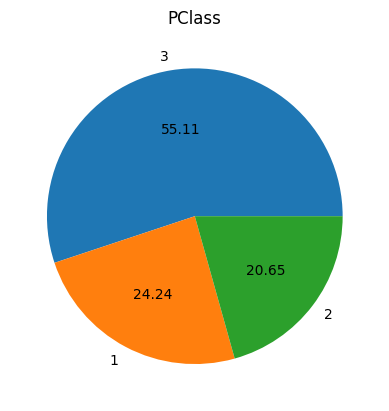

In [9]:
plt.pie(values,labels=labels,autopct='%.2f')
plt.title("PClass")
plt.show()

# Numerical Data

# Histogram

<Axes: xlabel='age', ylabel='Count'>

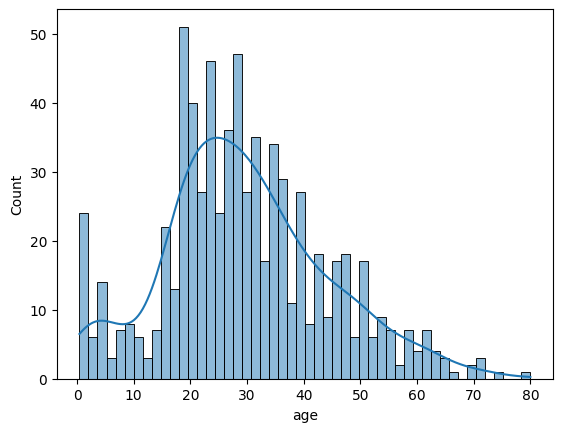

In [10]:
sns.histplot(df['age'],bins=50,kde=True)

# Displot

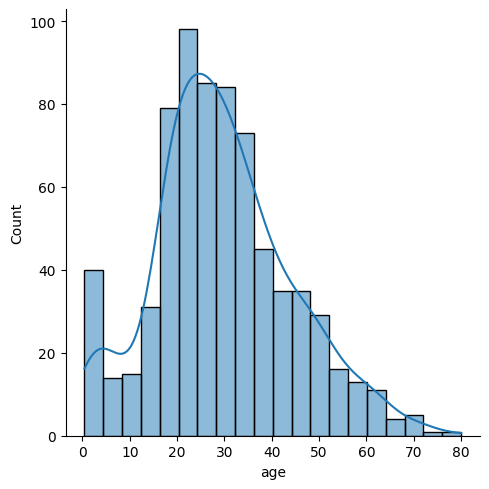

In [11]:
sns.displot(df['age'],kde=True)

# Boxplot

<Axes: ylabel='fare'>

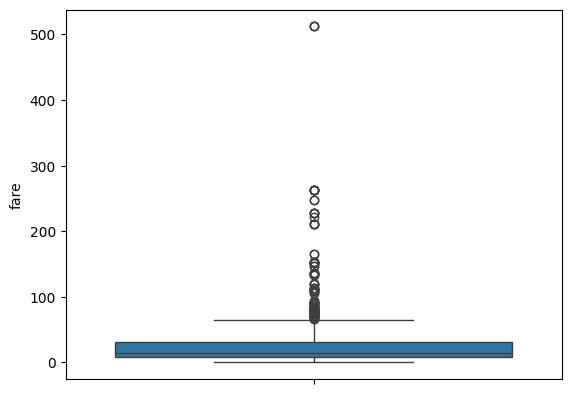

In [12]:
sns.boxplot(df['fare'])

# Multivariate Data

In [13]:
tips=sns.load_dataset('tips')
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
211,25.89,5.16,Male,Yes,Sat,Dinner,4
172,7.25,5.15,Male,Yes,Sun,Dinner,2
31,18.35,2.50,Male,No,Sat,Dinner,4
187,30.46,2.00,Male,Yes,Sun,Dinner,5


In [14]:
flights=sns.load_dataset('flights')
flights.sample(5)

,year,month,passengers
30,1951,Jul,199
12,1950,Jan,115
85,1956,Feb,277
38,1952,Mar,193
75,1955,Apr,269


In [15]:
iris=sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
80,5.5,2.4,3.8,1.1,versicolor
79,5.7,2.6,3.5,1.0,versicolor
50,7.0,3.2,4.7,1.4,versicolor
47,4.6,3.2,1.4,0.2,setosa


1. Scatterplot(Numerical -Numerical)

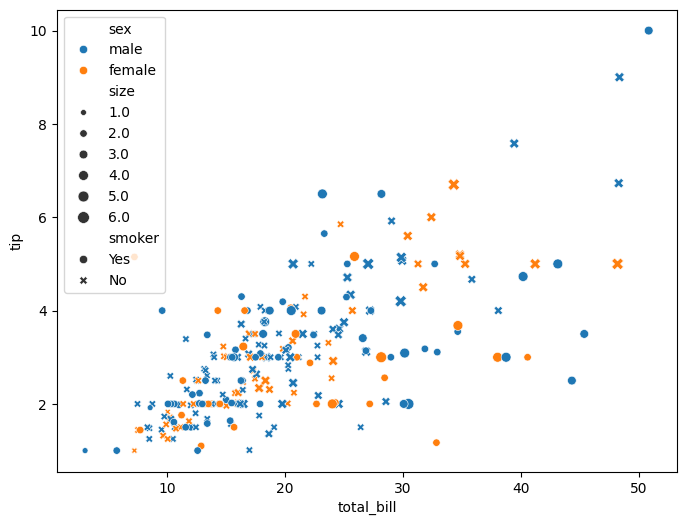

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(y=tips['tip'],x=tips['total_bill'],hue=df['sex'],style=tips['smoker'],size=tips['size'])
plt.show()

# barplot(numerical-numerical)

<Axes: xlabel='pclass', ylabel='age'>

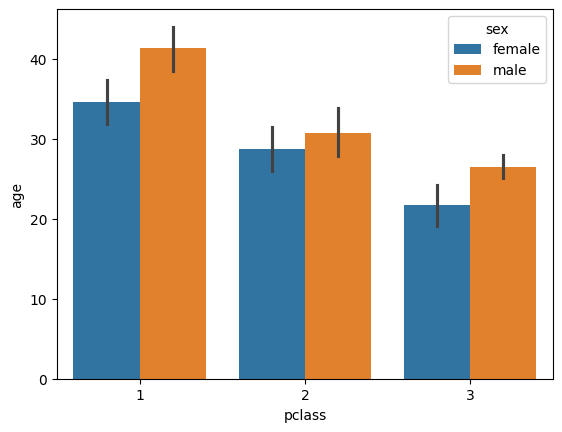

In [18]:
sns.barplot(y=df['age'],x=df['pclass'],hue=df['sex'])

3.Boxplot (Numerical -Categorical)

<Axes: xlabel='sex', ylabel='age'>

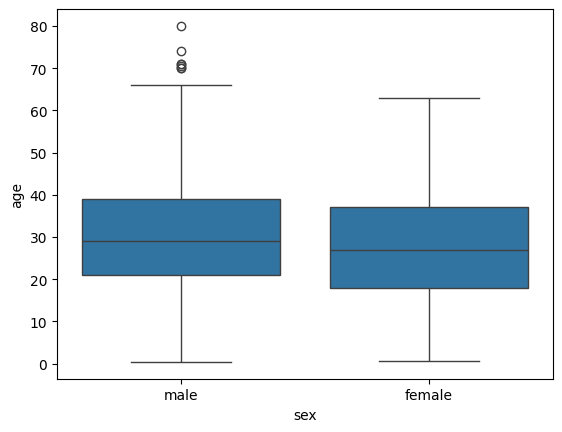

In [19]:
sns.boxplot(x=df['sex'],y=df['age'])

# Displot (Numerical-Categorical)

<ipython-input-20-2104058334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['survived']==1]['age'],hist=False)
<ipython-input-20-2104058334>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['survived']==0]['age'],hist=False)


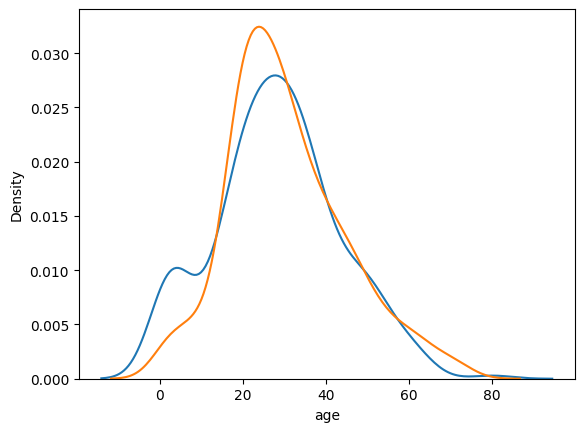

In [20]:
sns.distplot(df[df['survived']==1]['age'],hist=False)
sns.distplot(df[df['survived']==0]['age'],hist=False)
plt.show()

# 5. HeatMap

<Axes: >

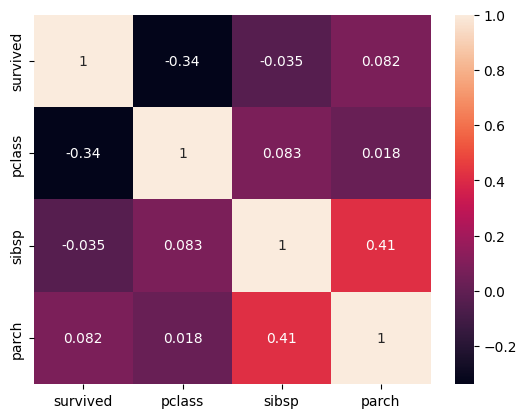

In [23]:
int_df = df.select_dtypes(include='int')
corr = int_df.corr()
sns.heatmap(corr, annot=True)

# ClusterMap (Categorical-Categorical)

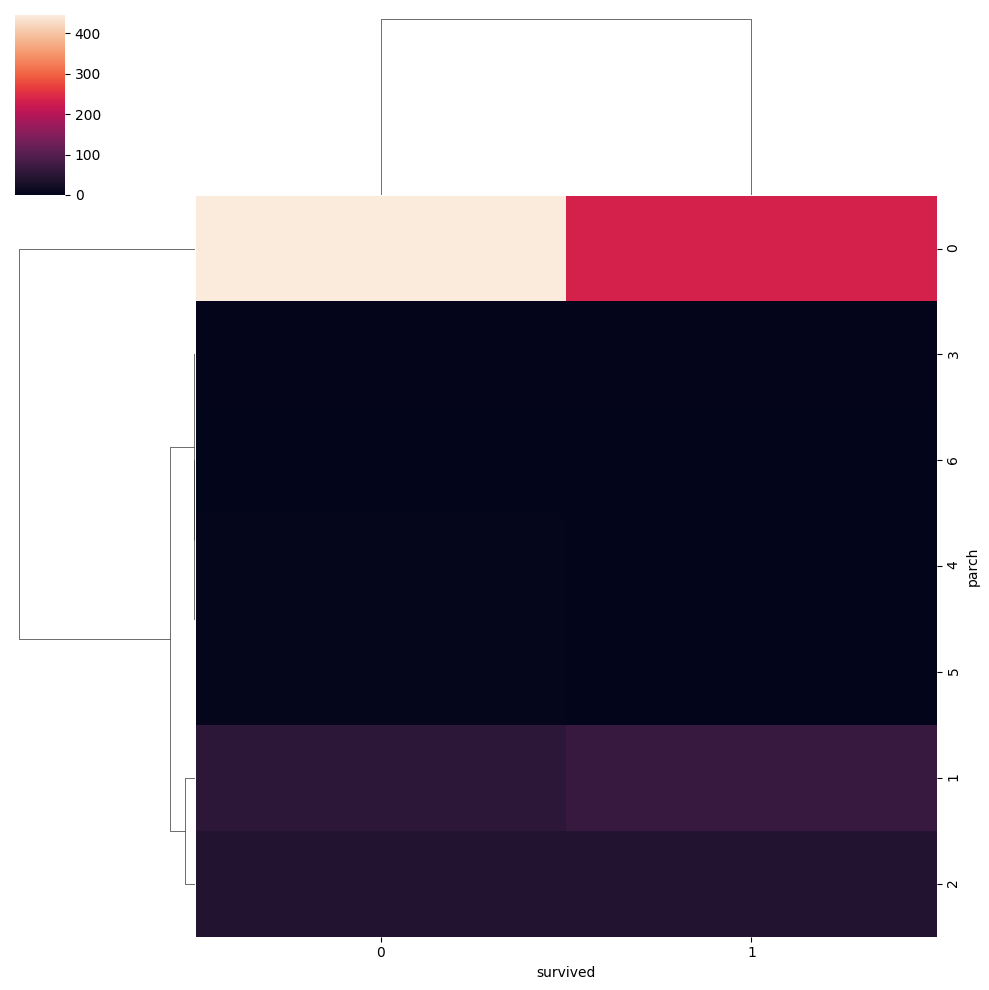

In [26]:
sns.clustermap(pd.crosstab(df['parch'],df['survived']))

# Pairplot

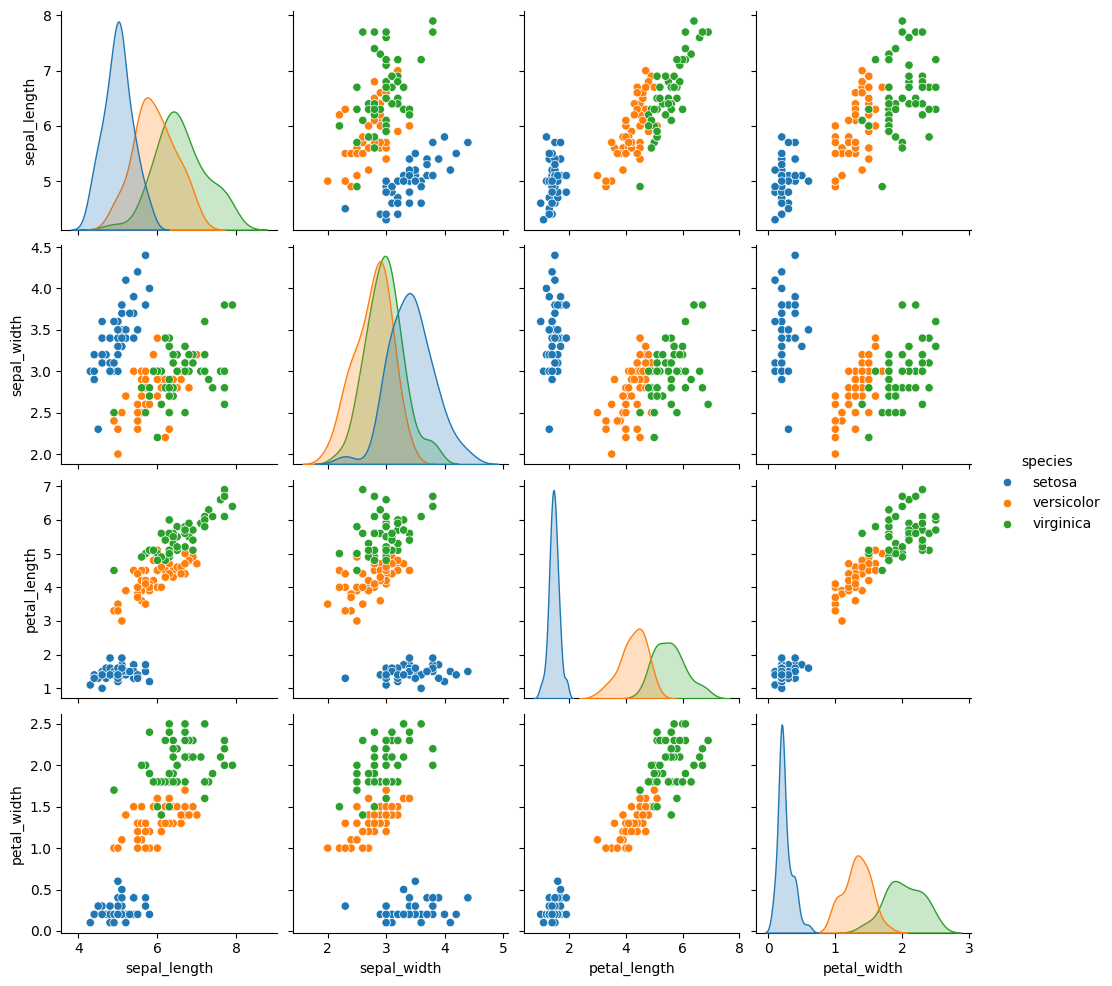

In [27]:
sns.pairplot(iris,hue="species")

# Lineplot (x- time based quantity)

In [29]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [56]:
f=flights.groupby('year')['passengers'].sum().reset_index()
f

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

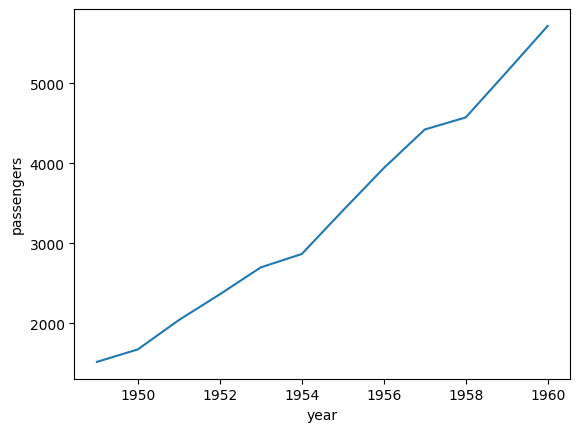

In [59]:
sns.lineplot(x=f['year'],y=f['passengers'])

In [62]:
flights.pivot_table(values="passengers",index="month",columns="year")

<ipython-input-62-1214489923>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values="passengers",index="month",columns="year")


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<ipython-input-61-2945631678>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values="passengers",index="month",columns="year"))


<Axes: xlabel='year', ylabel='month'>

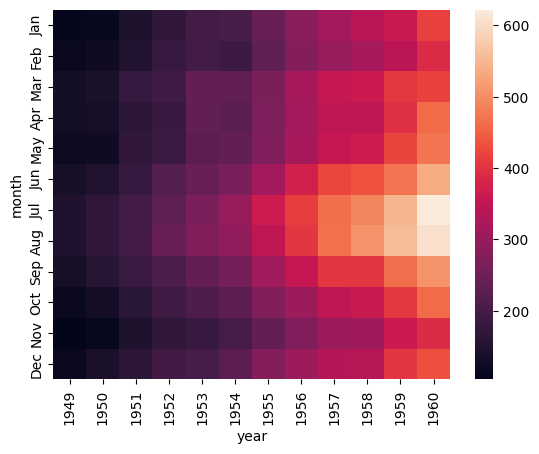

In [61]:
sns.heatmap(flights.pivot_table(values="passengers",index="month",columns="year"))